### Mall Customer Segmentation

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.

In [283]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [284]:
#Loading data
data = pd.read_csv("Mall_Customers.csv")

In [285]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [286]:
#Shape of dataset
data.shape

(200, 5)

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [288]:
#Statistical analysis
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [289]:
#Checking for missing values
data.isnull().sum()  

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Observations: 

There are no missing values!

In [290]:
#Checking for duplicates
data.duplicated().sum()

0

Observations: 

There are no duplicate values!

#### Exploratoty Data Analysis

In [291]:
#Distribution of Gender
data.Gender.value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

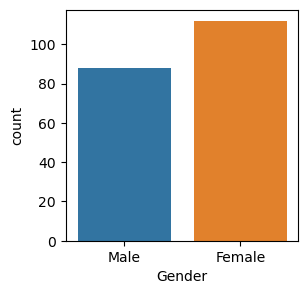

In [292]:
plt.figure(figsize=(3,3))
sns.countplot(x="Gender", data=data)
plt.show()

Observation: 

The distribution of Gender in our dataset indicates that 56% of the data points are labeled as "Female" and 44% are labeled as "Male."

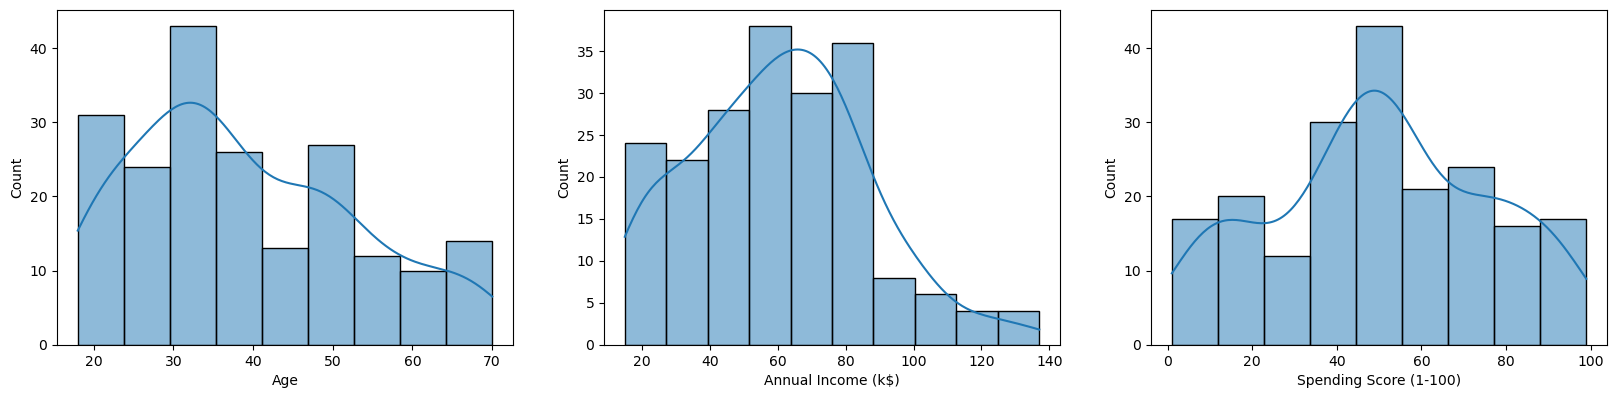

In [293]:
#Distribution of numerical columns
cols = ["Age","Annual Income (k$)","Spending Score (1-100)"]

plt.figure(figsize=(20,20))
for i in range(len(cols)):
    plt.subplot(4,3,i+1)
    sns.histplot(data[cols].iloc[:,i], kde= True)

Observations:

- For the "Age" column, the maximum distribution of age falls within the range of 30 to 35 years.
- In the "Annual Income (k$)" column, the highest concentration of data points occurs in the range of 45,000 to 90,000 dollars.
- The "Spending Score (1-100)" column shows a peak in the distribution around a spending score of 50 to 60.

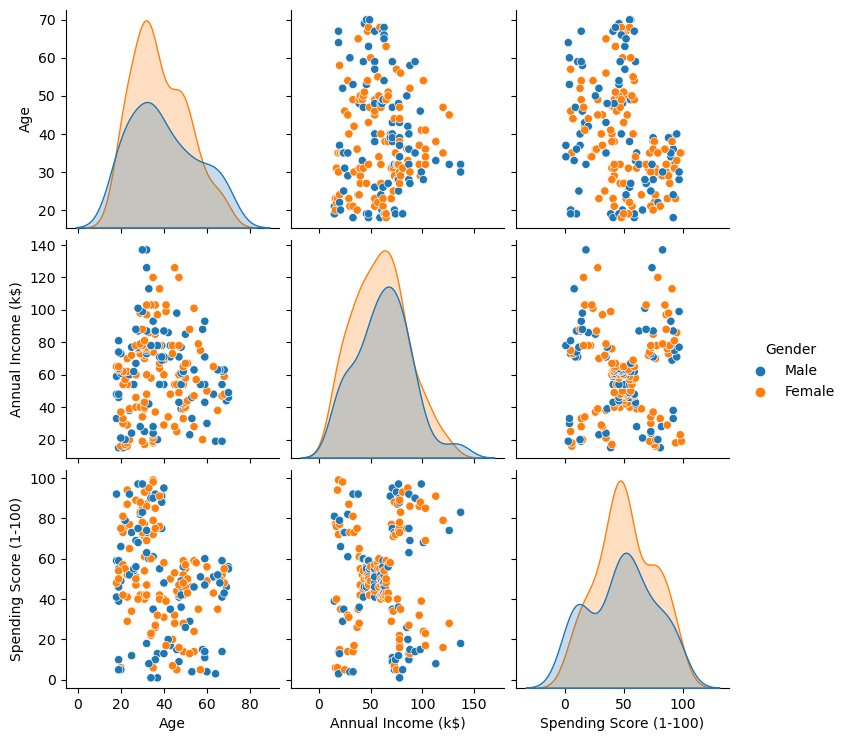

In [294]:
#Pairplot 
sns.pairplot(data[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]], diag_kind="kde", hue="Gender")
plt.show()

Observations: 

There is some amount of correlation between "Age","Annual Income" and "Spending Score"

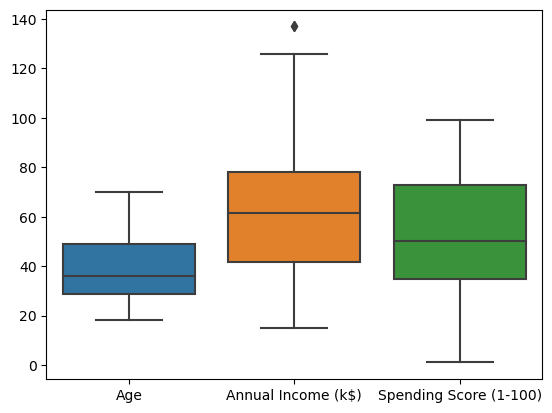

In [295]:
#Checking Outliers
sns.boxplot(data = data[cols])
plt.show()

In [296]:
#Investigating outlier in "Annual Income" column
data[data["Annual Income (k$)"] > 120]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Observations: 

Data looks genuine hence we are not going to treat these outliers

In [297]:
#Creating a copy of original data
data_copy = data.copy()

#### Encoding

In [298]:
#Encoding Gender column, Female =0 and Male =1 
data.Gender.replace(["Male", "Female"], [1,0], inplace=True)

In [299]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


### Model Building -  K Means Clustering

In [300]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [301]:
data['cluster'] = kmeans.labels_

In [302]:
#silhouette score
m = kmeans.fit_predict(data)
silhouette = silhouette_score(data, m)
print("The Silhouette Score for 2 clusters is :", silhouette)

The Silhouette Score for 2 clusters is : 0.4793398715941059


In [303]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,1
197,198,1,32,126,74,1
198,199,1,32,137,18,1


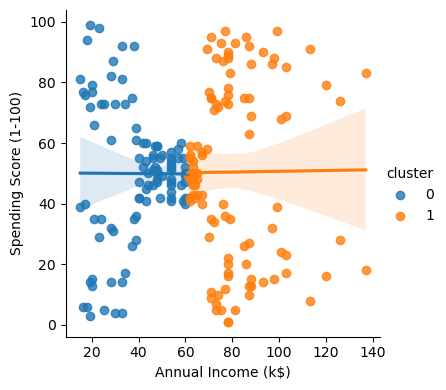

In [304]:
#Plotting 2d clusters using "Annual Income (k$)" and "Spending Score (1-100)"

sns.lmplot("Annual Income (k$)","Spending Score (1-100)",data=data,hue='cluster',height=4)
plt.show()

#### Elbow method to decide optimum no. of clusters (K value)

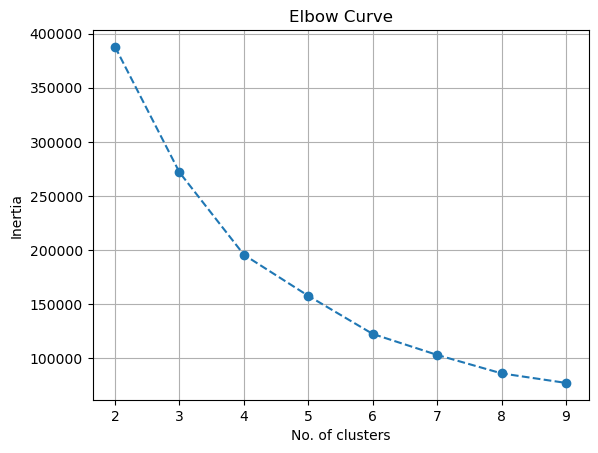

In [316]:
inertia = list()
for k in range(2,10):
    km = KMeans(n_clusters=k)
    km.fit(data)
    inertia.append(km.inertia_)
           
plt.plot(range(2,10), inertia, "o--")
plt.grid()
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

For clusters = 2 , The Silhouette_score is : 0.3826
For clusters = 3 , The Silhouette_score is : 0.401
For clusters = 4 , The Silhouette_score is : 0.3853
For clusters = 5 , The Silhouette_score is : 0.4002
For clusters = 6 , The Silhouette_score is : 0.3994
For clusters = 7 , The Silhouette_score is : 0.3951
For clusters = 8 , The Silhouette_score is : 0.3923
For clusters = 9 , The Silhouette_score is : 0.4003


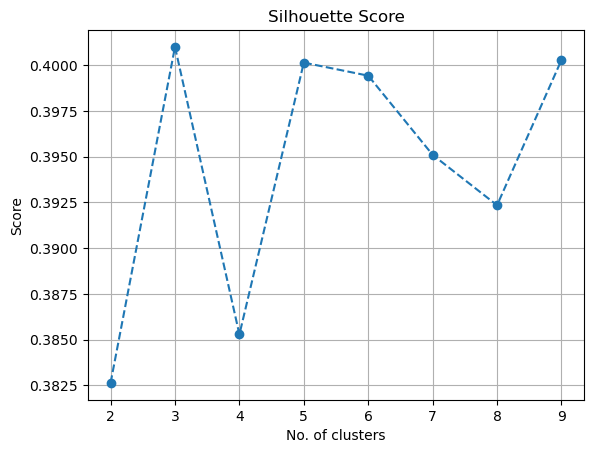

In [317]:
score = list()
for k in range(2,10):
    #score.append(silhouette_score(data,km.labels_))
    m = km.fit_predict(data)
    score.append(silhouette_score(data,m))
    print("For clusters =", k , ", The Silhouette_score is :", round(score[k-2],4))
    
plt.plot(range(2,10), score, "o--")
plt.grid()
plt.xlabel('No. of clusters')
plt.ylabel('Score')
plt.title('Silhouette Score')
plt.show()


### Using k = 3

In [321]:
#k=3
km_optimum = KMeans(n_clusters=3)
km_optimum.fit(data)

KMeans(n_clusters=3)

In [322]:
data['cluster'] = km_optimum.labels_

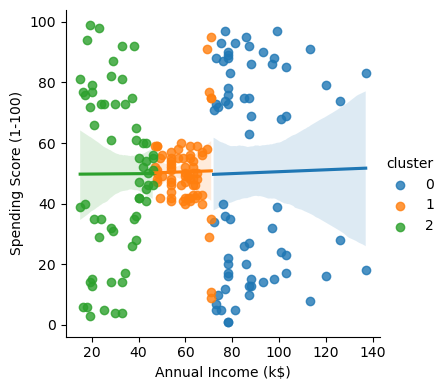

In [323]:
#Plotting 2d clusters using "Annual Income (k$)" and "Spending Score (1-100)"
sns.lmplot("Annual Income (k$)","Spending Score (1-100)",data=data,hue='cluster',height=4);
plt.show()

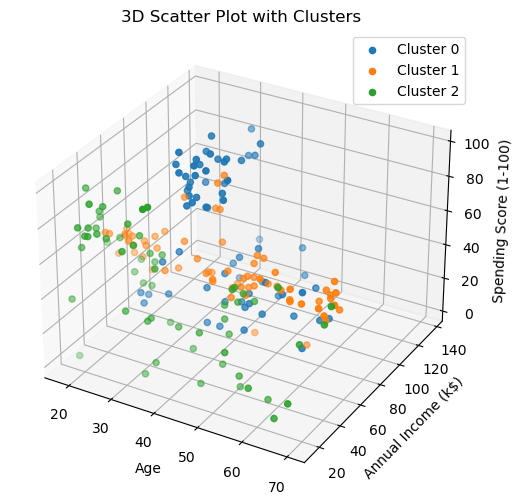

In [324]:
#Plotting 3d clusters using "Age", Annual Income (k$)" and "Spending Score (1-100)"
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(3):
    cluster_data = data[data['cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
ax.legend()
plt.show()

### Using k = 5

In [325]:
#k=5
km_optimum_5 = KMeans(n_clusters=5)
km_optimum_5.fit(data)
data['cluster'] = km_optimum_5.labels_

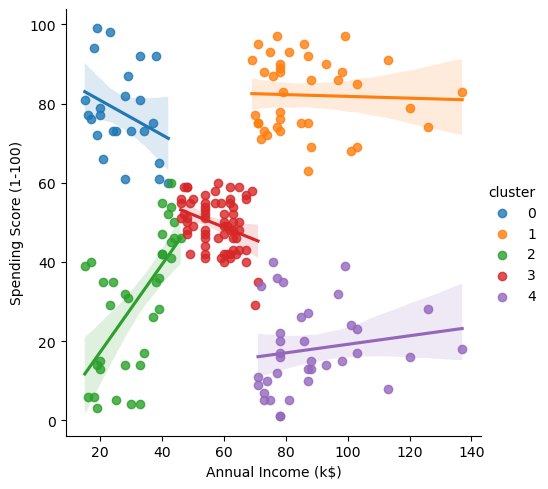

In [326]:
sns.lmplot("Annual Income (k$)","Spending Score (1-100)",data=data,hue="cluster");
plt.show()

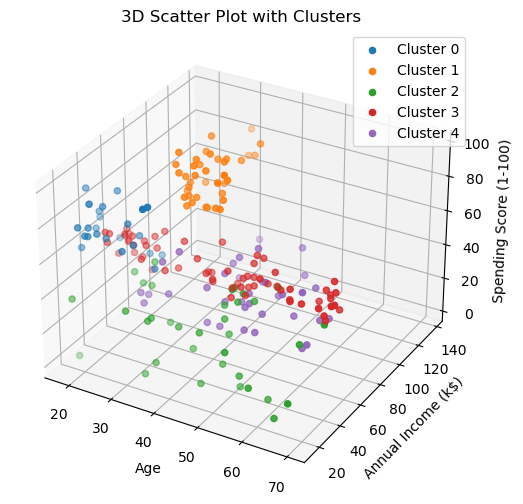

In [327]:
#Plotting 3d clusters using "Age", Annual Income (k$)" and "Spending Score (1-100)" for k = 5

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(5):
    cluster_data = data[data['cluster'] == cluster]
    ax.scatter(cluster_data['Age'], cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
               label=f'Cluster {cluster}')

# Customize the plot
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Scatter Plot with Clusters')
ax.legend()
plt.show()

Project by:

    Archana Kokate